# Summary

In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
# warnings.catch_warnings
warnings.filterwarnings(action='ignore')

## Read in dataset and seperate target variable 'Exited'

In [376]:
df = pd.read_csv('../data/finalized_customer_churn_records.csv')

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


In [377]:
target_variable = df['Exited']

df.drop(columns=['Exited'], axis=1, inplace=True)

if 'Exited' not in df.columns:
    print("'Exited' has been dropped from the dataframe")

df.head()

print(df.shape)

'Exited' has been dropped from the dataframe
(10000, 20)


## Split dataset into training and testing sets 

In [378]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(sampling_strategy='minority')
df, target_variable = sampler.fit_resample(df, target_variable)

RANDOM_STATE = 3

X_train, X_test, y_train, y_test = train_test_split(df, target_variable, test_size=.30, stratify=target_variable, random_state=RANDOM_STATE
)

print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}\nX_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')

X_test

X_train shape: (11146, 20)
y_train shape: (11146,)
X_test shape: (4778, 20)
y_test shape: (4778,)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
6015,615,59,4,155766.05,1,1,1,110275.17,0,1,306,0,0,1,0,1,1,0,0,0
6809,684,26,5,87098.91,1,0,0,106095.82,0,5,894,1,0,0,1,0,0,0,1,0
302,687,35,8,0.00,2,1,0,10334.05,0,5,809,1,0,0,0,1,0,0,1,0
2004,684,29,8,127269.75,1,0,1,79495.01,0,4,742,0,1,0,0,1,0,0,1,0
351,762,39,2,81273.13,1,1,1,18719.67,0,5,929,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13159,577,43,3,127940.47,1,0,0,125140.72,1,3,839,0,1,0,1,0,0,0,0,1
2576,645,36,4,59893.85,2,1,0,43999.64,0,5,420,0,0,1,0,1,1,0,0,0
4248,573,26,8,86270.93,2,1,1,90177.30,0,5,430,1,0,0,0,1,0,1,0,0
2588,741,32,5,0.00,1,1,1,64839.23,0,3,485,1,0,0,0,1,0,0,0,1


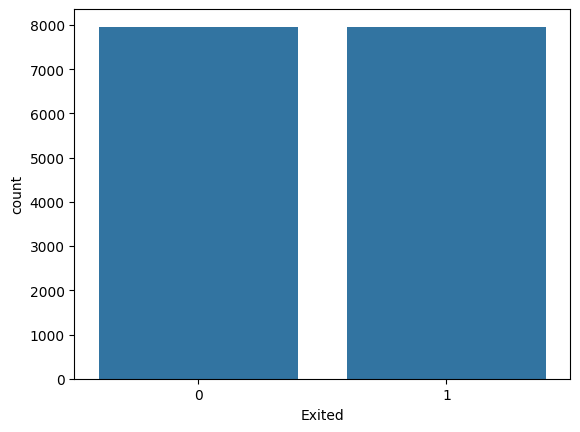

In [379]:
exited = pd.DataFrame({'Exited': target_variable})

sns.countplot(data=exited, x='Exited')
plt.show()

## Read in models

In [380]:
with open('../final_models/knn_model.pkl', 'rb') as model:
    knn_model = pickle.load(model)

with open('../final_models/svc_model.pkl', 'rb') as model:
    svc_model = pickle.load(model)

with open('../final_models/decision_tree_model.pkl', 'rb') as model:
    d_tree_model = pickle.load(model)

with open('../final_models/rf_model.pkl', 'rb') as model:
    rf_model = pickle.load(model) 

In [381]:
model_dict = {
    'knn': knn_model,
    'svc': svc_model,
    'decision_tree': d_tree_model,
    'random_forest': rf_model
}

In [382]:
for k,v in model_dict.items():
    print(f'Model - {k}:\nParams - {v.get_params()}\n\n')

Model - knn:
Params - {'algorithm': 'auto', 'leaf_size': 28, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 4, 'p': 3, 'weights': 'distance'}


Model - svc:
Params - {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 3, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Model - decision_tree:
Params - {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 3, 'splitter': 'best'}


Model - random_forest:
Params - {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, '

In [383]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model in model_dict.items():
    
    %time
    model.random_state = RANDOM_STATE
    preds = model.predict(X_test)
    confusion_matrix_ = confusion_matrix(y_test, preds)
    print('-'*10, name, '-'*10)
    print(classification_report(y_test, preds))
    print(f'False negative rate: {round(confusion_matrix_[0][1]/len(y_test), 3) / 100}')
    print()
    
    # preds_df = pd.DataFrame({'Ground truth labels': y_test, 'Predictions': preds})

    # print(preds_df.head())


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 11 µs


---------- knn ----------
              precision    recall  f1-score   support

           0       0.95      0.64      0.77      2389
           1       0.73      0.97      0.83      2389

    accuracy                           0.80      4778
   macro avg       0.84      0.80      0.80      4778
weighted avg       0.84      0.80      0.80      4778

False negative rate: 0.0018

CPU times: user 9 µs, sys: 13 µs, total: 22 µs
Wall time: 17.9 µs
---------- svc ----------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2389
           1       1.00      0.94      0.97      2389

    accuracy                           0.97      4778
   macro avg       0.97      0.97      0.97      4778
weighted avg       0.97      0.97      0.97      4778

False negative rate: 0.0

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
---------- decision_tree ----------
              precision    recall  f1-score   support

           0      

In [384]:
test_pred = X_test.iloc[1, :]
print(test_pred)

prediction = rf_model.predict([test_pred])

if prediction[0] == 0:
    print(f'\nThe customer is likely to NOT exit the bank.')
else:
    print(f'The customer is likely to exit the bank.')

CreditScore              684.00
Age                       26.00
Tenure                     5.00
Balance                87098.91
NumOfProducts              1.00
HasCrCard                  0.00
IsActiveMember             0.00
EstimatedSalary       106095.82
Complain                   0.00
Satisfaction Score         5.00
Point Earned             894.00
Geography_France           1.00
Geography_Germany          0.00
Geography_Spain            0.00
Gender_Female              1.00
Gender_Male                0.00
Card Type_DIAMOND          0.00
Card Type_GOLD             0.00
Card Type_PLATINUM         1.00
Card Type_SILVER           0.00
Name: 6809, dtype: float64

The customer is likely to NOT exit the bank.


In [385]:
features_list = [
    # 'CreditScore'
    420,
    # 'Age'=
    34,
    # 'Tenure'=
    3,
    # 'Balance'=
    12900.40,
    # 'NumOfProducts'=
    1.00,
    # 'HasCrCard'=
    1.00,
    # 'IsActiveMember'=
    1.00,
    # 'EstimatedSalary'=
    45000,
    # 'Complain'=
    1.00,
    # 'Satisfaction Score'=
    4.00,
    # 'Point Earned'=
    350.50,
    # 'Geography_France'=
    0.00,
    # 'Geography_Germany'=
    1.00,
    # 'Geography_Spain'=
    0.00,
    # 'Gender_Female'=
    1.00,
    # 'Gender_Male'=
    0.00,
    # 'Card Type_DIAMOND'=
    0.00,
    # 'Card Type_Gold'=
    1.00,
    # 'Card Type_PLATINUM'=
    0.00,
    # 'Card Type_SILVER'=
    0.00
]

new_predictions = rf_model.predict([features_list])
print(new_predictions[0])

1
